### Churn Analysis Exercise Notebook 2 of 2

In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns

# Scikit-Learn for Modeling
import sklearn

# Pickle for saving model files
import pickle

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Naive Bayes (Gaussian) has been reported as performing well on this dataset
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

from sklearn.linear_model import Lasso

# Function for splitting training and test set
from sklearn.model_selection import train_test_split 

# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# For standardization
from sklearn.preprocessing import StandardScaler

# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

# Classification metrics (added later)
from sklearn.metrics import roc_curve, auc

# Min-Max scaler (for use with Gaussian Classifiers)
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.feature_selection import RFE

# Box-Cox transformation
from scipy.stats import boxcox

# Used for custom transformers
from sklearn.base import TransformerMixin

# Import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

sklearn.__version__

'0.19.1'

# 1. Feature Importance Statistical test

** We have created feature variables that capture the sales data trends as inclining or declining. We have also create an RSI momentum variable along with mean, and aggregate sale figures. **

** The challenges now are to check whether is there correlation of trend movement to churn event
and to verify customer service hypotheses:**
** 1. Sales decline leads to end of business and churn**
** 2. Signififcant increases in sales lead to the client securing other financing options and churning.**

**We will also try to fit a predictive classification model to this data and present ana analysis of model fit and accuracy. **


** In the first notebook we have seen that higher RSI or sales momentum values seem to be associated
with higher rates of churn. Here we will do a chi-square test to check feature importance**


In [67]:
# Load analytical base table 
df = pd.read_csv('data/churn_analytical_base_table.csv', low_memory=False)

This test can only use positive values so we must drop columns with negative values.

In [3]:
df.drop(["supplier_key", "3_month_sales_change", "6_month_sales_change", "12_month_sales_change"], axis=1, inplace=True)

In [321]:
df["3_month_sales_performance"] = df["3_month_sales_performance"].astype(np.float64)
df["6_month_sales_performance"] = df["6_month_sales_performance"].astype(np.float64)
df["12_month_sales_performance"] = df["12_month_sales_performance"].astype(np.float64)

In [322]:
#normalize the necessary columns
df["3_month_mean_sales"] = df["3_month_mean_sales"] / df["3_month_mean_sales"].max()
df["6_month_mean_sales"] = df["6_month_mean_sales"] / df["6_month_mean_sales"].max()
df["12_month_mean_sales"] = df["12_month_mean_sales"] / df["12_month_mean_sales"].max()
df["total_mean_sales"] = df["total_mean_sales"] / df["total_mean_sales"].max()
df["3_month_rsi"] = df["3_month_rsi"] / df["3_month_rsi"].max()
df["6_month_rsi"] = df["6_month_rsi"] / df["6_month_rsi"].max()
df["12_month_rsi"] = df["12_month_rsi"] / df["12_month_rsi"].max()
df["3_month_total_sales"] = df["3_month_total_sales"] / df["3_month_total_sales"].max()
df["6_month_total_sales"] = df["6_month_total_sales"] / df["6_month_total_sales"].max()
df["12_month_total_sales"] = df["12_month_total_sales"] / df["12_month_total_sales"].max()
df["total_sales"] = df["total_sales"] / df["total_sales"].max()
df["3_month_sales_performance"] = df["3_month_sales_performance"] / df["3_month_sales_performance"].max()
df["6_month_sales_performance"] = df["6_month_sales_performance"] / df["6_month_sales_performance"].max()
df["12_month_sales_performance"] = df["12_month_sales_performance"] / df["12_month_sales_performance"].max()



In [323]:
#normalized dataframe values
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283
3_month_mean_sales,0.016082,0.000921,0.009926,0.236946,0.004753,0.039190,0.005645,0.000792,0.062143,0.008083,0.001401,0.000866,0.008613,0.005026,0.002708,0.009374,0.001073,0.009895,0.003817,0.000135,0.004012,0.003210,0.037183,0.004101,0.005332,0.021655,0.011156,0.000365,0.004578,0.005645,0.028058,0.080377,0.000872,0.000653,0.005092,0.013484,0.000118,0.014110,0.002321,0.438159,0.003674,0.017803,0.003789,0.003293,0.003012,0.000019,0.000928,0.006208,0.069118,0.008501,...,0.000331,0.001266,0.000305,0.001040,0.003918,0.001357,0.007632,0.002767,0.003433,0.002303,0.001142,0.031317,0.020041,0.183064,0.000228,0.004778,0.028393,0.005285,0.006073,0.019806,0.007831,0.000439,0.016672,0.002574,0.047682,0.000000,0.010218,0.033818,0.000773,0.001208,0.000123,0.009031,0.001205,0.004924,0.036137,0.001230,0.001032,0.001038,0.000235,0.017356,0.001761,0.111675,0.004372,0.002385,0.001127,0.010822,0.001257,0.006269,0.004965,0.005668
6_month_mean_sales,0.022338,0.001413,0.011648,0.216161,0.003792,0.031641,0.005830,0.001176,0.035277,0.007836,0.001165,0.000809,0.007825,0.003422,0.001752,0.011425,0.001024,0.007678,0.004405,0.000260,0.004204,0.005025,0.036775,0.004004,0.008742,0.015146,0.011845,0.000594,0.005907,0.005935,0.039430,0.069457,0.000530,0.001083,0.003757,0.013161,0.000391,0.012583,0.001418,0.558505,0.004001,0.025940,0.007637,0.003852,0.001853,0.000219,0.001074,0.019939,0.083264,0.006449,...,0.000781,0.002434,0.000842,0.001618,0.003518,0.001022,0.009818,0.002505,0.004911,0.002752,0.001387,0.084307,0.019032,0.348679,0.000614,0.005675,0.026981,0.010831,0.007848,0.013486,0.009126,0.002210,0.014187,0.005164,0.048641,0.001099,0.010031,0.019175,0.000586,0.002395,0.001156,0.011024,0.001643,0.004739,0.043124,0.003001,0.001133,0.000909,0.000509,0.018859,0.002130,0.075040,0.005363,0.004443,0.001606,0.017381,0.003578,0.005162,0.005655,0.006163
12_month_mean_sales,0.021044,0.001554,0.008353,0.208404,0.002491,0.030278,0.004635,0.002547,0.018340,0.004391,0.000606,0.001087,0.004371,0.001779,0.000911,0.011188,0.000638,0.006932,0.003673,0.000444,0.002185,0.006147,0.045803,0.002851,0.013715,0.007875,0.011456,0.000438,0.004775,0.006203,0.043324,0.052355,0.000276,0.001309,0.008549,0.008482,0.000423,0.012433,0.000783,0.423632,0.004202,0.025728,0.013128,0.003632,0.000964,0.001349,0.000566,0.027532,0.087413,0.008697,...,0.001851,0.004583,0.001518,0.001034,0.002332,0.000803,0.013598,0.002406,0.005218,0.007124,0.000880,0.105021,0.020556,0.317322,0.000986,0.005569,0.018573,0.013797,0.010686,0.007011,0.009978,0.003688,0.011883,0.003599,0.053149,0.000629,0.006350,0.009969,0.000315,0.002203,0.001342,0.014175,0.001218,0.003110,0.045423,0.002646,0.000786,0.000618,0.001729,0.016477,0.001942,0.054157,0.006353,0.004388,0.001276,0.017728,0.004338,0.004018,0.006463,0.004939
total_mean_sales,0.021212,0.003945,0.005098,0.178252,0.001942,0.052890,0.002758,0.005469,0.013345,0.003323,0.001125,0.001051,0.003063,0.001295,0.000663,0.018401,0.000608,0.009497,0.002243,0.000603,0.001654,0.006642,0.042759,0.002875,0.031036,0.005730,0.016145,0.000344,0.003868,0.004881,0.053883,0.036966,0.000209,0.001415,0.006940,0.005733,0.000795,0.010084,0.000593,0.243030,0.003899,0.014099,0.029266,0.002446,0.000701,0.001788,0.000397,0.027083,0.160758,0.008619,...,0.002338,0.008424,0.006245,0.000699,0.001474,0.001591,0.013181,0.004046,0.003248,0.005107,0.000555,0.294742,0.033147,0.397086,0.003347,0.006803,0.016055,0.034546,0.017132,0.005102,0.008529,0.003443,0.015091,0.002673,0.047733,0.000425,0.004655,0.007544,0.000260,0.002389,0.007096,0.008449,0.000795,0.001804,0.026921,0.005718,0.001699,0.000450,0.001087,0.008937,0.002986,0.042662,0.008839,0.003379,0.000840,0.018665,

In [324]:
array = df.values
#based on df dimensions nominate Y as target column number
X = array[:,0:14]
Y = array[:,11]

In [325]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=6)
fit = test.fit(X, Y)
# Summarize scores
np.set_printoptions(precision=3)
features = fit.transform(X)

In [329]:
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [False False False False False  True  True False False False False  True
  True  True]
Feature Ranking: [ 7  4  9 10  2  1  1  6  5  8  3  1  1  1]


** The chi2 test is showing features 5,6,11,12,13 as most important. These are the 6 and 12 month RSI and the 3,6,12 month sales performance features.**

# 2. Churn Prediction Exercise

In [22]:
# Load analytical base table 
df = pd.read_csv('data/churn_analytical_base_table.csv', low_memory=False)


This is a classification task. We are trying to predict whether customers will churn or not. Here we follow a standard ML workflow. We split our data into train and tet sets and will parametrize and test the performance of 4 classification algorithms. The 4 algorithms used will be :

    Regularized L1 logistic regression - penalize the absolute size of model coefficients.
    Regularized L2 logistic regresion - penalize the squared size of model coefficients.
    Random Forest Classifier
    Gradient Boosting Classifier

The model will give us a probability of whether a customer will churn or not.


In [24]:
# Create separate object for target variable
y = df["churned"]

# Create separate object for input features
X = df.drop(["churned", "supplier_key"], axis=1)

** We will split the train/test set 80/20. We also stratify to ensure the target feature is balanced in each subset of data. **

In [25]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=df["churned"])

# Print number of observations in X_train, X_test, y_train, and y_test
print( len(X_train), len(X_test), len(y_train), len(y_test) )

227 57 227 57


In [26]:
y_train.mean()

0.44933920704845814



In this sample c. 45% of the customers have churned.

We will use 4 classification algorithms, create pipelines for each and set algorithm hyperparameters. Note that we standardize the feature values but subtracting means and dividing by standard deviation across the feature set.


In [27]:
pipelines = {
    'l1' : make_pipeline(StandardScaler(), LogisticRegression(penalty='l1' , random_state=321)),
    'l2' : make_pipeline(StandardScaler(), LogisticRegression(penalty='l2' , random_state=321)),
    'rf' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=321)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=321))
}

In [28]:
# Logistic Regression hyperparameters
l1_hyperparameters = {'logisticregression__C' : np.linspace(1e-3, 1e3, 10),}
l2_hyperparameters = {'logisticregression__C' : np.linspace(1e-3, 1e3, 10),}

# Random Forest hyperparameters
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [20, 40],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.5],
    'randomforestclassifier__min_samples_leaf': [1,3,5]
}
#Gradient Boosting hyperparameters
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [20, 40],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2, 0.3],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}

In [29]:
hyperparameters = {
    'l1' : l1_hyperparameters,
    'l2' : l2_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}



Use cross validation to tune each model. Here we use 10 fold cross-validation - i.e., we iteratively create 9 folds plus 1 hold-out fold and will average the training score over the 10 hold-out folds.

In [30]:
fitted_models = {}
#algs_to_test = ['l1', 'l2', 'rf', 'gb','gnb', 'bnb']
algs_to_test = ['l1', 'l2','rf', 'gb']

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=5, n_jobs=-1)
    
    # Fit model on X_train, y_train
    if name in algs_to_test:
        model.fit(X_train, y_train)
        fitted_models[name] = model
        print(name, 'has been fitted')
        

l1 has been fitted
l2 has been fitted
rf has been fitted
gb has been fitted


Let's look at the holdout accuracy scores. This is the percent of observations correctly classified by the models on the cross-validation training sets. 

In [31]:
for name, model in fitted_models.items():
    print(name, model.best_score_)


l1 0.6563876651982379
l2 0.6563876651982379
rf 0.6299559471365639
gb 0.6387665198237885


,importance
3_month_rsi,0.126119
12_month_rsi,0.121761
total_mean_sales,0.078232
3_month_mean_sales,0.071983
3_month_sales_change,0.070945
6_month_rsi,0.070011
6_month_sales_change,0.065953
6_month_mean_sales,0.060743
total_sales,0.058000
3_month_total_sales,0.057654


In [33]:
# Generate the predicted probabilities from our fitted models on the test data
pred_dict = {}

if 'l1' in algs_to_test:
    pred_l1 = fitted_models['l1'].predict(X_test)
    prob_l1 = fitted_models['l1'].predict_proba(X_test)
    pred_dict['pred_l1'] = pred_l1
    pred_dict['prob_l1'] = prob_l1
    
    
if 'l2' in algs_to_test:
    pred_l2 = fitted_models['l2'].predict(X_test)
    prob_l2 = fitted_models['l2'].predict_proba(X_test)
    pred_dict['pred_l2'] = pred_l2
    pred_dict['prob_l2'] = prob_l2
    
if 'rf' in algs_to_test:
    pred_rf = fitted_models['rf'].predict(X_test)
    prob_rf = fitted_models['rf'].predict_proba(X_test)
    pred_dict['pred_rf'] = pred_rf
    pred_dict['prob_rf'] = prob_rf
    
if 'gb' in algs_to_test:
    pred_gb = fitted_models['gb'].predict(X_test)
    prob_gb = fitted_models['gb'].predict_proba(X_test)
    pred_dict['pred_gb'] = pred_gb
    pred_dict['prob_gb'] = prob_gb
    
if 'gnb' in algs_to_test:
    pred_gnb = fitted_models['gnb'].predict(X_test)
    prob_gnb = fitted_models['gnb'].predict_proba(X_test)
    pred_dict['pred_gnb'] =pred_gnb
    pred_dict['prob_gnb'] = prob_gnb
    
if 'bnb' in algs_to_test:
    pred_bnb = fitted_models['bnb'].predict(X_test)
    prob_gnb = fitted_models['gnb'].predict_proba(X_test)
    pred_dict['pred_bnb'] = pred_bnb
    pred_dict['prob_bnb'] = prob_bnb



Lets look at RandomForest Churn prediction performance in some more detail.


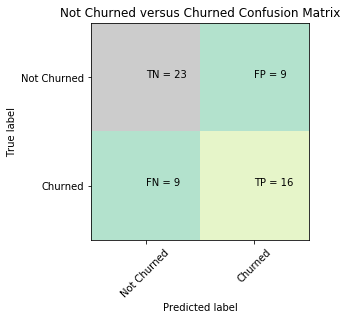

In [39]:
cm = confusion_matrix(y_test, pred_dict['pred_rf'])
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel2)
classNames = ['Not Churned','Churned']
plt.title('Not Churned versus Churned Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [35]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

print("True Negatives: ", TN, "Correctly predicted \"Not Churned\" Customer")
print("False Positives: ", FP, "Incorrectly predicted as \"Churned\"" )
print("False Negatives: ", FN, "Incorrectly predicted as \"Not Churned\"")
print("True Positives: ", TP, "Correctly predicted as \"Churned\"")

True Negatives:  23 Correctly predicted "Not Churned" Customer
False Positives:  9 Incorrectly predicted as "Churned"
False Negatives:  9 Incorrectly predicted as "Not Churned"
True Positives:  16 Correctly predicted as "Churned"


Incorrect classification as a false positive or false negative has a specific name.
    Type I Error: The incorrect rejection of a true null hypothesis or a false positive.
    Type II Error: The incorrect failure of rejection of a false null hypothesis or a false negative.
These value are plotted on the ROC curves below.

In [36]:
print(classification_report(y_test, pred_dict['pred_rf']))

             precision    recall  f1-score   support

          0       0.72      0.72      0.72        32
          1       0.64      0.64      0.64        25

avg / total       0.68      0.68      0.68        57




The sklearn documentation defines these values as follows: The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F1 score can be interpreted as a weighted harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.

The support is the number of occurrences of each class in y_pred.

The precision and recall scores are 0.68% respectively for predicting churn. This is 
an ok initial result, however the sample sizes are very small and therefore confidence is lower in these results. The last metric we will examine here is the ROC curve = Reciever Operating Characteristic plot. It is a way to visualize the relationship between TPR and FPR for classification models. It plots the true positive rate and false positive rate at different classification probability thresholds.

As well as returning binary classifications of 0,1, for customer churned or not respectively, we can also look at the probability or confidence in each churn classiciation prediction.


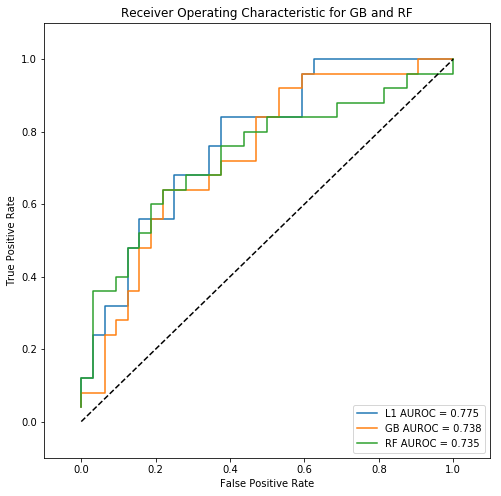

In [40]:
# Initialize plot
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic for GB and RF')

# ---- L1 ---- #

# Calculate ROC curve from y_test and the predicted probabilities for charged-off loans using the L1 algorithm.
#The list comprehension below here returns the probabilities associated with charged-off predictions.
fpr, tpr, thresholds = roc_curve(y_test, [p[1] for p in pred_dict['prob_l1']])

# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('L1', auroc))


# ---- Gradient Boosting ---- #

# Calculate ROC curve from y_test and the predicted probabilities for charged-off loans using the gb algorithm.
#The list comprehension below here returns the probabilities associated with charged-off predictions.
fpr, tpr, thresholds = roc_curve(y_test, [p[1] for p in pred_dict['prob_gb']])

# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('GB', auroc))


# ---- Random Forest ---- #

fpr, tpr, thresholds = roc_curve(y_test, [p[1] for p in pred_dict['prob_rf']])

    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('RF', auroc))


# ---- Legend and labels ---- #

# Plot legend
plt.legend(loc='lower right')

# Plots 45 degree dotted black line
plt.plot([0,1],[0,1],'k--', label='random guess')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**The AUROC metric is robust against imbalanced classes and tells us the the likelihood that our model can distinguish between a randomly chosen customer that will churn versus a randomly chosen customer that will not churn.**

** The RF algorithm perfomed best on the holdout data from the training set. When we test the batch of algorithms against the 20% of the test data we see that l1 Lasso regression algorithm performs well with a prediction accuracy of 0.78% of correctly predicting whether a customer will churn.**

** Out of the box performance of 0.79 with a small dataset would encourage me to test this model on a much larger data set. The dataset is so small that it is difficult to say much about it with confidence.**

# 3. Feature Importance with Random Forest

**Having fitted a random forest regressor, we can display the feature importance ranking as follows.** 

In [66]:
#print(fitted_models['l1'].best_estimator_.named_steps.logisticregression.coef_)
#print(fitted_models['rf'].best_estimator_.named_steps.randomforestclassifier.feature_importances_)

feature_importances = pd.DataFrame(fitted_models['rf'].best_estimator_.named_steps.randomforestclassifier.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
3_month_rsi,0.126119
12_month_rsi,0.121761
total_mean_sales,0.078232
3_month_mean_sales,0.071983
3_month_sales_change,0.070945
6_month_rsi,0.070011
6_month_sales_change,0.065953
6_month_mean_sales,0.060743
total_sales,0.058000
3_month_total_sales,0.057654


** The RSI index for 3 and 12 months are rated highly by the RF.
There is now some evidence that the RSI index is a useful predictor of churn.
The evidence for the sales performance binned variables is weaker.
A good next step would be to remodel this feature and test with more data.**

Save the best model for future analysis.

In [349]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['l1'].best_estimator_, f)